In [ ]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import math
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import os

RANDOM_SEED = 42
NUM_CLASSES = 5


"""
buy_post - целевая переменная
date_diff_post - целевая переменная
"""

'\nbuy_post - целевая переменная\ndate_diff_post - целевая переменная\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
url = os.chdir(r"/content/drive/MyDrive/hackatonZP/")
df = pd.read_parquet('train_dataset_hackaton2023_train.gzip')
df_test = pd.read_parquet('test_dataset_hackaton2023_test.gzip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['dish_name'].value_counts()

Кинг Фри мал                         137633
Наггетсы (3 шт.)                     128744
Кинг Фри станд                        96546
Соус Сырный                           90844
Кинг Фри бол                          79374
                                      ...  
Up Острый Ролл Индейка Пармезан           1
Энергет.нап. Адреналин Раш 0,449л         1
Up Ангус Камамбер                         1
Up  Острый Тильзитер Ролл                 1
Сбер.Капучино (СТАНД.) за 1руб            1
Name: dish_name, Length: 972, dtype: int64

In [ ]:
def solve(a):
    a = a.lower()
    for i in [
        ' ',
        'станд',
        '(6 шт.)',
        '(3 шт.)',
        '(9 шт.)',
        'Т3.1RUB.АНГУС',
        'бол',
        '1',
        '2',
        '3',
        '4',
        'л',
        'xl',
    ]:
        a = a.replace(i, '')
    return a

a = df['dish_name']
a = a.apply(solve)
len(a.unique())

957

<ipython-input-15-011a757bde40>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

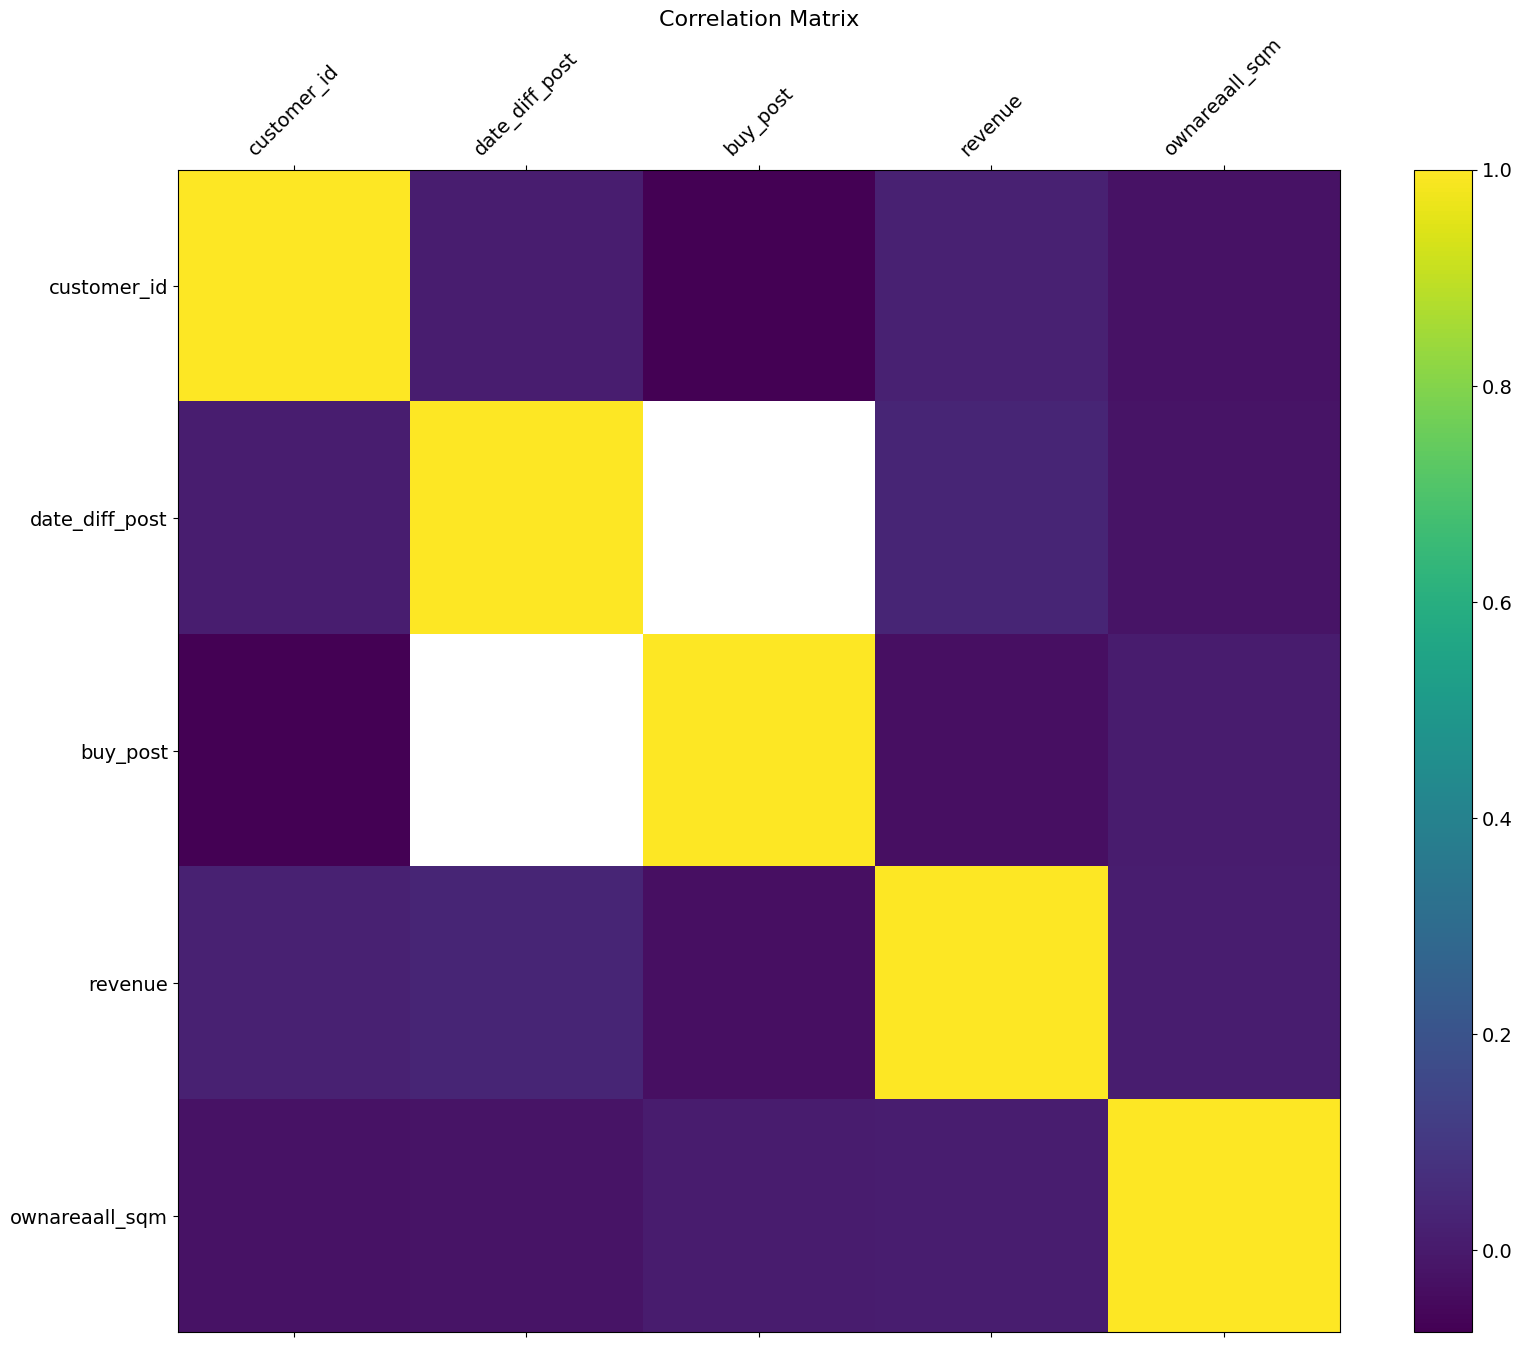

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,date_diff_post,buy_post,revenue,ownareaall_sqm
customer_id,1.000000,0.008563,-0.075547,0.023711,-0.024211
date_diff_post,0.008563,1.000000,NaN,0.034748,-0.019564
buy_post,-0.075547,NaN,1.000000,-0.030912,0.007663
revenue,0.023711,0.034748,-0.030912,1.000000,0.011853
ownareaall_sqm,-0.024211,-0.019564,0.007663,0.011853,1.000000


#Общая предобработка


In [ ]:
"""
def get_year(date):
  return int(str(date).split('-')[0])

def get_month(date):
  return int(str(date).split('-')[1])

def get_date(date):
  return int(str(date)[8:10])
"""

In [ ]:
"""
df['year'] = df['startdatetime'].apply(get_year)
df['month'] = df['startdatetime'].apply(get_month)
df['date'] = df['startdatetime'].apply(get_date)
df = df.drop(columns=['startdatetime'])
df
"""

Exception ignored in: <function _xla_gc_callback at 0x7d49c37c09d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d49c37c09d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d49c37c09d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7d49c37c09d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _

In [ ]:
a = LabelEncoder()
df['dish_name'] = a.fit_transform(df['dish_name'])
df_test['dish_name'] = a.fit_transform(df_test['dish_name'])
df

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,589,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,982,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,900,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,1035,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,625,300.0,Отдельно стоящий без внешней зоны
...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,train,7.99,2023-08-01 18:04:56,1021,300.0,Фудкорт с туалетом
24261975,46661804,NaN,0,train,84.98,2023-08-01 18:04:56,501,300.0,Фудкорт с туалетом
24261976,46661804,NaN,0,train,70.03,2023-08-01 18:04:56,719,300.0,Фудкорт с туалетом
24261977,46661804,NaN,0,train,19.00,2023-08-01 18:04:56,916,300.0,Фудкорт с туалетом


In [ ]:
b = LabelEncoder()
df['format_name'] = b.fit_transform(df['format_name'])
df_test['format_name'] =b.transform(df_test['format_name'])
df

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,589,300.0,2
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,982,300.0,2
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,900,300.0,2
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,1035,300.0,2
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,625,300.0,2
...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,train,7.99,2023-08-01 18:04:56,1021,300.0,8
24261975,46661804,NaN,0,train,84.98,2023-08-01 18:04:56,501,300.0,8
24261976,46661804,NaN,0,train,70.03,2023-08-01 18:04:56,719,300.0,8
24261977,46661804,NaN,0,train,19.00,2023-08-01 18:04:56,916,300.0,8


#Разбиение на каждого человека

In [ ]:
groups = df_test.groupby('customer_id')

In [ ]:
empty = np.array([0] * len(df_test['customer_id'].unique()))
df_train = pd.DataFrame({
    'customer_id': empty,
    'popular_dish': empty,
    'avg_revenue': empty,
    'avg_sqm': empty,
    'popular_format': empty,
    'm1_dish': empty,
    'm2_dish': empty,
    'm1_sqm': empty,
    'm2_sqm': empty,
    'm1_revenue': empty,
    'm2_revenue': empty,
    'm2_interval': empty,
    'mean_delta_time': empty,
    'visits': empty
})
df_train = df_train.reset_index()

for i, customer in tqdm(enumerate(df_test['customer_id'].unique())):
    customer = groups.get_group(customer).reset_index()
    df_train.at[i, 'customer_id'] = customer.at[0, 'customer_id']

    meals = customer.groupby('startdatetime')
    pt = 0
    for j, meal in enumerate(customer['startdatetime'].unique()):
        meal = meals.get_group(meal).reset_index()
        if j > 1:
            break
        df_train.at[i, f'm{j+1}_dish'] = meal['dish_name'].value_counts().idxmax()
        df_train.at[i, f'm{j+1}_revenue'] =  meal['revenue'].sum()
        df_train.at[i, f'm{j+1}_sqm'] = meal['ownareaall_sqm'].iloc[0]
        if j > 0:
            df_train.at[i, f'm{j+1}_interval'] = (meal['startdatetime'].iloc[0] - pt) / np.timedelta64(1, 'D')
        pt = meal['startdatetime'].iloc[0]

    df_train.at[i, 'visits'] = len(customer['startdatetime'].unique())
    df_train.at[i, 'mean_interval'] = (customer['startdatetime'].iloc[len(customer['startdatetime']) - 1] - customer['startdatetime'].iloc[0]) / np.timedelta64(1, 'D') / df_train.at[i, 'visits']

    df_train.at[i, 'avg_revenue'] = customer['revenue'].mean()
    df_train.at[i, 'avg_sqm'] = customer['ownareaall_sqm'].mean()

    df_train.at[i, 'popular_dish'] = customer['dish_name'].value_counts().idxmax()

    df_train.at[i, 'popular_format'] = customer['format_name'].value_counts().idxmax()

df_train

112334it [18:04, 103.61it/s]


,index,customer_id,popular_dish,avg_revenue,avg_sqm,popular_format,m1_dish,m2_dish,m1_sqm,m2_sqm,m1_revenue,m2_revenue,m2_interval,mean_delta_time,visits,mean_interval
0,0,13220760,666,40.141587,175.790476,8,607,178,174.40,74.10,2.00,419.98,-15.761007,0,11,-0.991379
1,1,30315975,789,142.490000,235.000000,1,789,845,235.00,235.00,584.96,144.98,-26.936829,0,3,0.000000
2,2,21679985,666,48.471053,209.526316,7,666,666,165.00,165.00,274.98,349.99,16.060093,0,8,5.267212
3,3,29754274,899,112.202632,98.421053,7,899,833,150.00,80.00,509.96,690.95,-21.969896,0,4,-5.492474
4,4,7797823,666,71.571529,114.500000,7,94,666,114.50,114.50,468.97,520.96,11.252500,0,12,2.748228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112329,112329,14023374,469,104.990000,105.200000,7,469,803,105.20,105.20,99.99,44.99,-19.909722,0,3,-15.381258
112330,112330,34923292,925,174.976667,241.733333,6,925,925,227.50,270.20,149.98,224.97,25.796794,0,3,-0.978383
112331,112331,32761835,898,146.747500,123.640000,7,898,458,115.46,109.50,99.00,199.00,4.847801,0,4,1.239201
112332,112332,38322785,478,233.656667,117.550000,8,478,956,117.55,117.55,599.98,99.99,0.013113,0,3,0.001331


In [ ]:
df_train.to_csv("main_test.csv")

In [ ]:
drive.mount("/content/gdrive")
url = os.chdir(r"/content/gdrive/MyDrive/hackatonZP/")

Mounted at /content/gdrive


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
X, y = df_train.drop(columns=['customer_id', 'buy_post', 'index', 'date_diff_post']), df_train['buy_post']

In [ ]:
X = X.fillna(-1)
y = y.fillna(-1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   popular_dish_product  500000 non-null  int64  
 1   avg_revenue           500000 non-null  float64
 2   avg_sqm               500000 non-null  float64
 3   popular_format        500000 non-null  int64  
 4   m1_dish               500000 non-null  int64  
 5   m2_dish               500000 non-null  int64  
 6   m1_sqm                500000 non-null  float64
 7   m2_sqm                500000 non-null  float64
 8   m1_revenue            500000 non-null  float64
 9   m2_revenue            500000 non-null  float64
 10  m2_interval           500000 non-null  float64
 11  mean_delta_time       500000 non-null  int64  
 12  visits                500000 non-null  int64  
 13  mean_interval         500000 non-null  float64
 14  popular_dish          500000 non-null  float64
dtype

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500000 entries, 0 to 499999
Series name: buy_post
Non-Null Count   Dtype
--------------   -----
500000 non-null  int64
dtypes: int64(1)
memory usage: 3.8 MB


In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

sw = compute_sample_weight(
    class_weight = 'balanced',
    y = y
)

NameError: ignored

In [ ]:
cross_val_score(xgb.XGBClassifier(sample_weight=sw), X, y, scoring='f1')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:34:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sample_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:34:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sample_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:34:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sample_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:34:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sample_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:34:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sample_weight" } are not us

array([0.8370418 , 0.83549879, 0.83618503, 0.83473183, 0.82860971])

In [ ]:
y.value_counts()

1    359095
0    140905
Name: buy_post, dtype: int64

In [ ]:
sw = np.array([359095 / (359095 + 140905), 140905 / (359095 + 140905)])
sw
class_weight = {
    0: 140905,
    1: 359095,
}
pos_weight = sum(class_weight.values()) / sum(class_weight.keys())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m = xgb.XGBClassifier(scale_pos_weight=pos_weight, class_weight=class_weight)
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
f1_score(y_test, y_pred)

NameError: ignored

In [ ]:
drive.mount("/content/gdrive")
url = os.chdir(r"/content/gdrive/MyDrive/hackatonZP/")
df_train = pd.read_csv('main_train.csv')
df_train

Mounted at /content/gdrive


,Unnamed: 0,index,customer_id,buy_post,date_diff_post,popular_dish_product,avg_revenue,avg_sqm,popular_format,m1_dish,m2_dish,m1_sqm,m2_sqm,m1_revenue,m2_revenue,m2_interval,mean_delta_time,visits,mean_interval,popular_dish
0,0,0,29891,1,9.0,0,149.627941,439.029412,6,589,625,300.00,300.00,389.97,119.99,0.100428,0,25,2.316445,47.0
1,1,1,30477,1,10.0,0,93.042623,320.000000,2,632,461,320.00,320.00,99.99,399.99,0.192454,0,25,2.079109,588.0
2,2,2,31426,1,4.0,0,109.227791,153.000000,7,786,857,153.00,153.00,49.99,99.98,0.122477,0,24,2.091698,900.0
3,3,3,44491,1,42.0,0,51.490000,128.884000,3,510,858,139.00,139.00,344.97,49.97,0.012164,0,4,6.960298,857.0
4,4,4,44939,1,9.0,0,66.593200,171.474400,7,899,900,129.27,129.27,604.93,554.94,7.181852,0,3,5.149244,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,499995,46624509,0,NaN,0,85.081818,112.530000,7,978,720,112.53,112.53,514.95,99.99,0.014687,0,3,0.407315,978.0
499996,499996,499996,46625265,0,NaN,0,92.297692,120.000000,8,987,900,120.00,120.00,349.96,49.99,0.008623,0,3,0.005027,900.0
499997,499997,499997,46639170,1,10.0,0,99.083636,80.200000,7,847,847,80.20,80.20,169.99,399.97,0.048738,0,3,0.047388,847.0
499998,499998,499998,46654016,1,15.0,0,203.321667,270.000000,6,656,652,270.00,270.00,469.96,179.99,0.076979,0,3,0.083773,656.0


In [ ]:
df_train['popular_dish_product'].unique()

array([0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [ ]:
df2 = df_train.dropna()
X, y = df2.drop(columns=['mean_delta_time', 'customer_id', 'buy_post', 'index', 'date_diff_post', 'popular_dish_product']), df2['date_diff_post']

regr = RandomForestRegressor()
regr.fit(X, y)

RandomForestRegressor()

In [ ]:
y_pred = regr.predict(df_train.drop(columns=['mean_delta_time', 'customer_id', 'buy_post', 'index', 'date_diff_post', 'popular_dish_product']))

In [ ]:
max_score = -999999
max_i = 0
y_ = df_train['buy_post'].fillna(80)
for i in tqdm(range(-900, 600)):
  i /= 10
  if max_score < f1_score(y_, (y_pred > max_i).astype(bool)):
    max_i = i
    max_score = f1_score(y_, (y_pred > max_i).astype(bool))
    print(max_score)

  0%|          | 1/1500 [00:00<14:21,  1.74it/s]

0.835984378910365


  6%|▌         | 83/1500 [00:20<05:44,  4.11it/s]


KeyboardInterrupt: ignored

In [ ]:
max_i, max_score

(-50.0, 0.0)

In [ ]:
empty = np.array([0] * len(df['customer_id'].unique()))
df_train = pd.DataFrame({
    'customer_id': empty,
    'buy_post': empty,
    'date_diff_post': empty,
    'popular_dish': empty,
    'avg_revenue': empty,
    'avg_sqm': empty,
    'popular_format': empty,
    'm1_dish': empty,
    'm2_dish': empty,
    'm1_sqm': empty,
    'm2_sqm': empty,
    'm1_revenue': empty,
    'm2_revenue': empty,
    'm2_interval': empty,
    'mean_delta_time': empty,
    'visits': empty
})
df_train = df_train.reset_index()

for i, customer in tqdm(enumerate(df['customer_id'].unique())):
    customer = groups.get_group(customer).reset_index()
    df_train.at[i, 'customer_id'] = customer.at[0, 'customer_id']
    df_train.at[i, 'buy_post'] = customer.at[0, 'buy_post']
    df_train.at[i, 'date_diff_post'] = customer.at[0, 'date_diff_post']

    meals = customer.groupby('startdatetime')
    pt = 0
    for j, meal in enumerate(customer['startdatetime'].unique()):
        meal = meals.get_group(meal).reset_index()
        if j > 1:
            break
        df_train.at[i, f'm{j+1}_dish'] = meal['dish_name'].value_counts().idxmax()
        df_train.at[i, f'm{j+1}_revenue'] =  meal['revenue'].sum()
        df_train.at[i, f'm{j+1}_sqm'] = meal['ownareaall_sqm'].iloc[0]
        if j > 0:
            df_train.at[i, f'm{j+1}_interval'] = (meal['startdatetime'].iloc[0] - pt) / np.timedelta64(1, 'D')
        pt = meal['startdatetime'].iloc[0]

    df_train.at[i, 'visits'] = len(customer['startdatetime'].unique())
    df_train.at[i, 'mean_interval'] = (customer['startdatetime'].iloc[len(customer['startdatetime']) - 1] - customer['startdatetime'].iloc[0]) / np.timedelta64(1, 'D') / df_train.at[i, 'visits']

    df_train.at[i, 'avg_revenue'] = customer['revenue'].mean()
    df_train.at[i, 'avg_sqm'] = customer['ownareaall_sqm'].mean()

    df_train.at[i, 'popular_dish'] = customer['dish_name'].value_counts().idxmax()

    df_train.at[i, 'popular_format'] = customer['format_name'].value_counts().idxmax()

df_train